# Connecticut Real Estate Sales Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# supressing pandas warning for this notebook for better clarity
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data importing

In [3]:
# for the dataset refer to: https://catalog.data.gov/dataset/real-estate-sales-2001-2018

real_estate_df = pd.read_csv("./Real_Estate_Sales_2001-2023_GL.csv", low_memory=False)

In [4]:
real_estate_df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


## Data cleaning

In [5]:
# remove rows that have all NaN values
real_estate_df.dropna(how="all")

# renaming column names for clarity
real_estate_df = real_estate_df.rename(
    columns={
        'Date Recorded': 'Recorded Date of Sale',
        'List Year': 'Year of Listing',
    }
)

real_estate_df.head()



,Serial Number,Year of Listing,Recorded Date of Sale,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


## Data exploration

### Analysis-1(a): Analyzing the Percentage of Real Estate Properties Sold below Assessed Value by Year

#### Data cleaning and Augmentation

In [6]:

# filter out the rows where "Recorded Date of Sale" is NaN
valid_sales_df = real_estate_df[real_estate_df["Recorded Date of Sale"].notna()]

# verifying all NaN values were removed
display(valid_sales_df[valid_sales_df["Recorded Date of Sale"].isna()])

,Serial Number,Year of Listing,Recorded Date of Sale,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location


In [23]:

# ensuring that the columns are casted to the appropriate data type
valid_sales_df['Recorded Date of Sale'] = valid_sales_df['Recorded Date of Sale'].astype('str')

# identifying that many values in the Date of Sale column have years
# listed as 0023 instead of 2023 or 0024 instead of 2024, so augmenting
# the data with the last two digits of the year
valid_sales_df['Year of Sale'] = valid_sales_df['Recorded Date of Sale'].apply(
    lambda x: x.split('/')[2][2:]
)

# remove any properties sold outside of 2001-2024
valid_sales_df['Year of Sale'] = valid_sales_df['Year of Sale'].astype('int')
valid_sales_df = valid_sales_df[
    (valid_sales_df['Year of Sale'] >= 1) & (valid_sales_df['Year of Sale'] <= 24)
]

# correcting the Year values 
valid_sales_df['Year of Sale'] = valid_sales_df['Year of Sale'].apply(
    lambda x: x + 2000
)

# remove commas from sales ratio
valid_sales_df['Sales Ratio'] = valid_sales_df['Sales Ratio'].astype('str').apply(
    lambda x: x.replace(',', '')
)

valid_sales_df.head()

,Serial Number,Year of Listing,Recorded Date of Sale,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Year of Sale
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),2021
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN,2021
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN,2021
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN,2020
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988),2022


#### Visualization and Insights

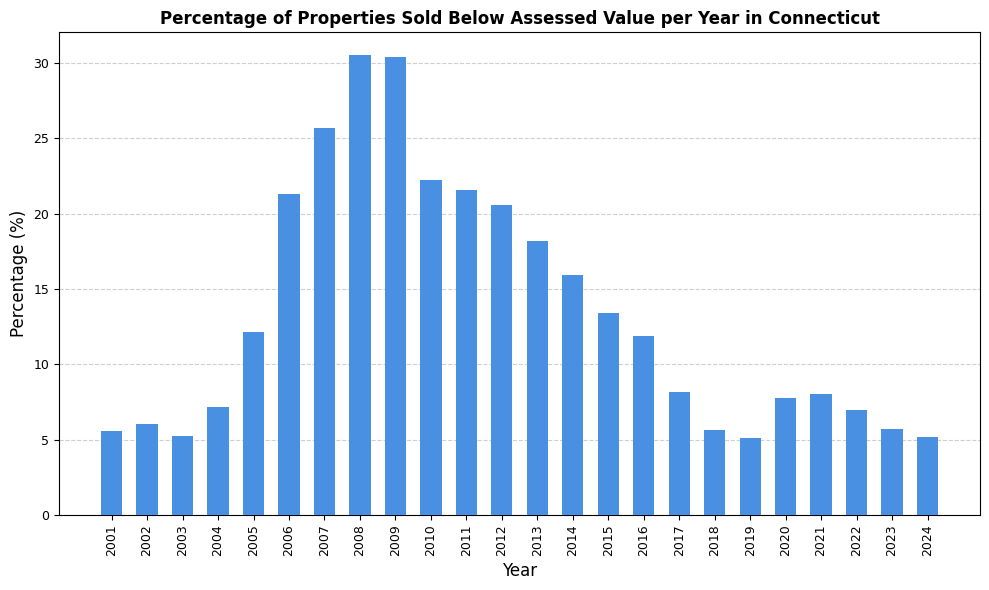

In [8]:
analysis_1_df = valid_sales_df

x_data = analysis_1_df['Year of Sale'].unique()

total_df = analysis_1_df.groupby(['Year of Sale']).count()['Serial Number']

sales_ratio_df = analysis_1_df[analysis_1_df['Sales Ratio'].astype('float') > 1.0]
below_df = sales_ratio_df.groupby(['Year of Sale']).count()['Serial Number']

y_data = (below_df / total_df) * 100

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(x_data, y_data, width=0.6, color="#4a90e2", edgecolor="none")

ax.set_title("Percentage of Properties Sold Below Assessed Value per Year in Connecticut", fontsize=12, weight="bold")
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

plt.xticks(x_data, rotation=90, size=9)
plt.yticks(size=9)

ax.grid(axis="y", linestyle="--", alpha=0.6)

for bar in bars:
    bar.set_zorder(3)
    bar.set_linewidth(0)

plt.tight_layout()
plt.show()


### Analysis-1(b): Analyzing the Number of Real Estate Properties Sold below Assessed Value as Compared to Total Properties Sold by Year

#### Visualization and Insights

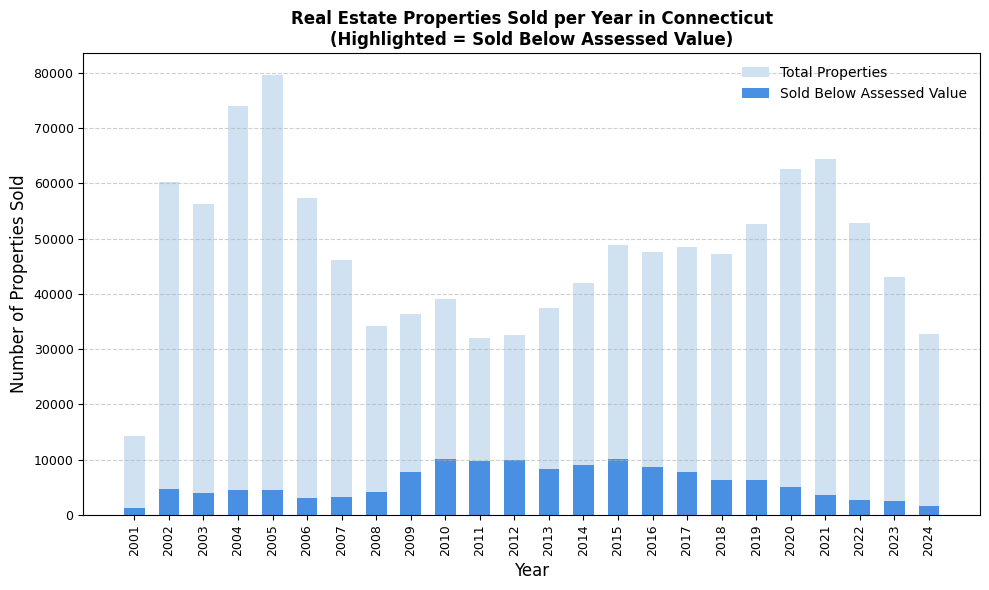

In [9]:

# total properties per year
total_df = analysis_1_df.groupby('Year of Sale').count()['Serial Number']

below_df = analysis_1_df[
    analysis_1_df['Sales Ratio'].astype(float) > 1.0
].groupby('Year of Sale').count()['Serial Number']

below_df = below_df.reindex(total_df.index, fill_value=0)

x_data = total_df.index
total_values = total_df.values
below_values = below_df.values

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(x_data, total_values, color="#d0e2f2", width=0.6, label="Total Properties")

ax.bar(x_data, below_values, color="#4a90e2", width=0.6, label="Sold Below Assessed Value")

ax.set_title("Real Estate Properties Sold per Year in Connecticut\n(Highlighted = Sold Below Assessed Value)", fontsize=12, weight="bold")
ax.set_ylabel("Number of Properties Sold", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

plt.xticks(x_data, rotation=90, size=9)
plt.yticks(size=9)

ax.grid(axis="y", linestyle="--", alpha=0.6)

ax.legend(frameon=False)

plt.tight_layout()
plt.show()

**Insights** : Connecticut’s real estate market hit its peak in the mid-2000s but dropped off sharply during the 2008 financial crisis, when many properties sold for less than their assessed values. While the market gradually recovered and even surged during the pandemic in 2020–2021, overall sales have slowed noticeably since 2022. Still, the number of sales falling below assessed value has stayed relatively low.

### Analysis-2: Analyzing the Number of "Housing" Properties Sold below Assessed Value as Compared to Total Housing Properties Sold by Year


#### Data Cleaning & Augmentation

In [10]:
# exploring the unique Property Type values
valid_sales_df['Property Type'].unique()

array(['Residential', 'Commercial', 'Vacant Land', 'Public Utility',
       'Apartments', 'Industrial', nan, 'Condo', 'Two Family',
       'Single Family', 'Three Family', 'Four Family'], dtype=object)

In [11]:
# filtering in all Housing properties
analysis_2_df = valid_sales_df[valid_sales_df['Property Type'].isin((
    'Residential',
    'Apartments',
    'Condo',
    'Single Family',
    'Two Family',
    'Three Family',
    'Four Family'
))]

**NOTE:** There is insufficient data for years 2001-2006 so filtering that data out

In [12]:
# filtering out the data before 2007
analysis_2_df = analysis_2_df[analysis_2_df['Year of Sale'] > 2006]

#### Visualization & Insights

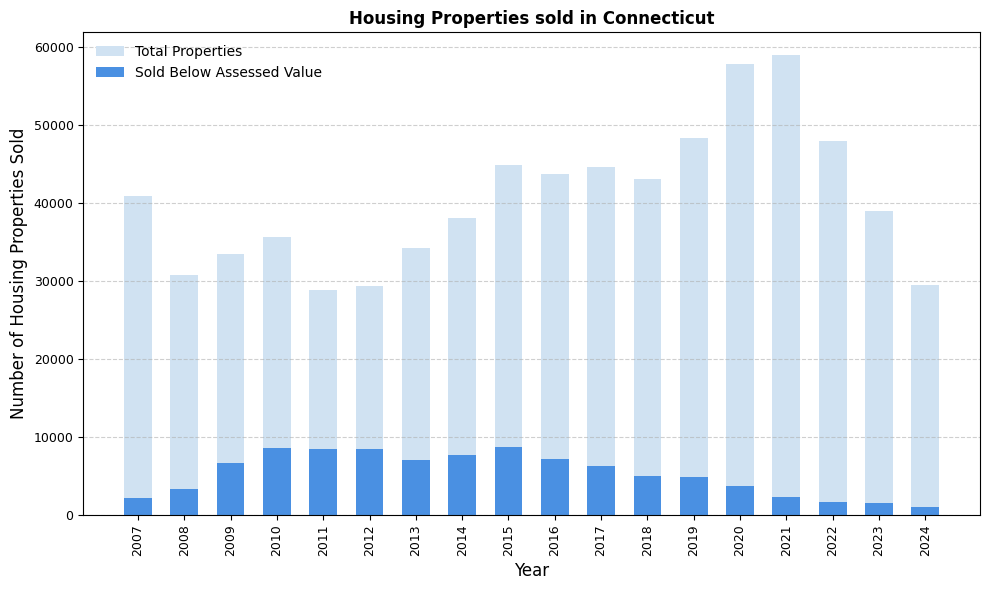

In [13]:

# total properties per year
total_df = analysis_2_df.groupby('Year of Sale').count()['Serial Number']

below_df = analysis_2_df[
    analysis_2_df['Sales Ratio'].astype(float) > 1.0
].groupby('Year of Sale').count()['Serial Number']

below_df = below_df.reindex(total_df.index, fill_value=0)

x_data = total_df.index
total_values = total_df.values
below_values = below_df.values

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(x_data, total_values, color="#d0e2f2", width=0.6, label="Total Properties")

ax.bar(x_data, below_values, color="#4a90e2", width=0.6, label="Sold Below Assessed Value")

ax.set_title("Housing Properties sold in Connecticut", fontsize=12, weight="bold")
ax.set_ylabel("Number of Housing Properties Sold", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

plt.xticks(x_data, rotation=90, size=9)
plt.yticks(size=9)

ax.grid(axis="y", linestyle="--", alpha=0.6)

# legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

**Insights** : Connecticut’s housing market has come a long way since the 2008 financial crisis, when distressed sales were common and many homes sold below their assessed values. Although total sales hit record highs during the pandemic, the noticeable drop since 2022 points to cooling demand, likely influenced by rising interest rates and growing affordability concerns in the US as a whole.


### Analysis-3: Analyzing Different "Housing" Property Price Trends over a Decade


#### Data Cleaning & Augmentation

In [14]:
# creating a new dataframe with required property types
housing_property_df =  valid_sales_df[valid_sales_df['Property Type'].isin((
    'Condo',
    'Single Family',
    'Two Family',
    'Three Family',
    'Four Family'
))]

**NOTE:** There is insufficient data for years 2001-2006 so filtering out that data

In [15]:
# filtering out the data before 2007
housing_property_df = housing_property_df[(housing_property_df['Year of Sale'] >= 2007) & (housing_property_df['Year of Sale'] <= 2016)]

In [16]:
# creating a new dataframe with columns containing average prices of each property type
analysis_3_df = housing_property_df.groupby(['Property Type', 'Year of Sale'])['Sale Amount'].mean().apply(lambda x: round(x, 2))
analysis_3_df = analysis_3_df.unstack('Property Type')

display(analysis_3_df)

Property Type,Condo,Four Family,Single Family,Three Family,Two Family
Year of Sale,,,,,
2007,268302.92,277945.14,499665.38,281199.89,283910.02
2008,253857.84,226540.56,416020.20,194028.04,219458.83
2009,225220.19,169820.03,345669.88,124529.53,167327.14
2010,233047.91,148278.60,389414.13,125698.18,153493.87
2011,220901.54,139957.44,350549.22,122249.85,139749.84
2012,232790.10,185732.42,421288.96,134578.81,161135.57
2013,230723.61,185330.34,399794.42,153019.17,174990.07
2014,241354.86,228338.76,380017.54,137864.14,170503.82
2015,231117.66,237385.00,372393.14,157303.07,175452.15


#### Visualizations & Insights

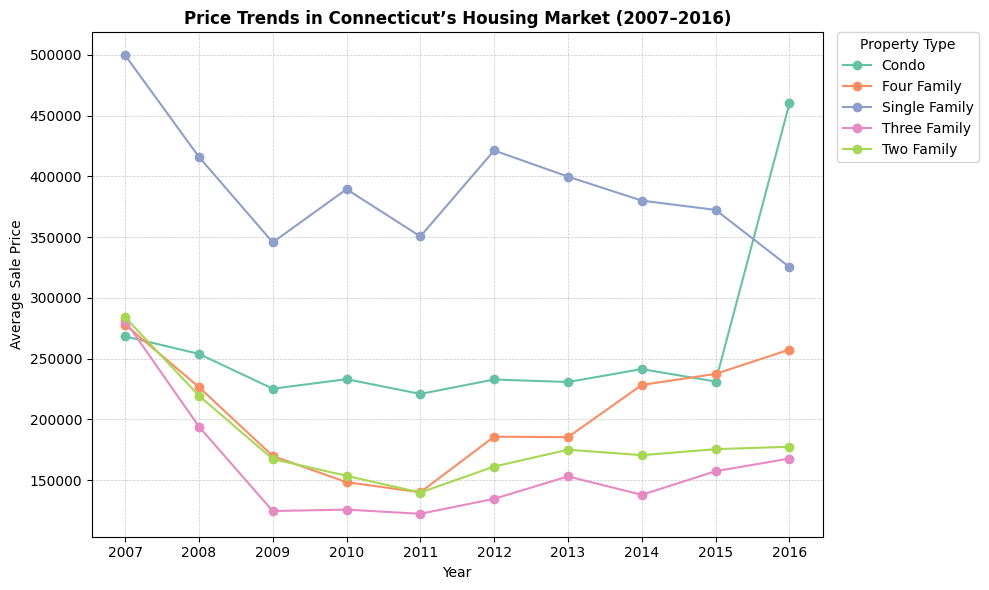

In [17]:

plt.figure(figsize=(10, 6))

color_cycle = plt.cm.Set2.colors  
for i, prop in enumerate(analysis_3_df.columns):
    plt.plot(analysis_3_df.index, analysis_3_df[prop], marker='o', label=prop, color=color_cycle[i % len(color_cycle)])

plt.xticks(np.arange(2007, 2017, 1))

plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.title("Price Trends in Connecticut’s Housing Market (2007–2016)",fontsize=12, weight="bold")

plt.legend(
    title="Property Type",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


**Insights** : Over the past decade, Connecticut’s housing market has gradually moved away from being dominated by single-family homes, with condos leading the way. Meanwhile, multi-family properties seem to be growing steadliy post the 2008 crisis sell-off.


### Analysis-4: Analyzing the Relationship between Assessed Values and Sale Amounts for "Commercial" Properties across Towns over the Period 2020–2024


#### Data Cleaning & Augmentation

In [18]:
# filtering data with Towns listed below

# major_towns: Bridgeport, Stamford, Danbury, New Haven
# developing_towns: Hartford, Middletown, Manchester
# small_towns: Roxbury, Washington

selected_towns_df = valid_sales_df[valid_sales_df['Town'].isin((
    'Bridgeport',
    'Stamford',
    'Danbury',
    'New Haven',
    'Hartford',
    'Middletown',
    'Manchester',
    'Roxbury',
    'Washington'
))]

In [19]:
# filtering out data whose Property Type is not Commercial
selected_towns_df = selected_towns_df[selected_towns_df['Property Type'] == "Commercial"]

In [20]:
# filtering Year of Sale in order to calculate an average of 5 years from 2020-2024
selected_towns_df = selected_towns_df[selected_towns_df['Year of Sale'] >= 2020]
selected_towns_df['Year of Sale'].unique()

array([2022, 2021, 2020, 2023, 2024])

In [21]:
# creating a new dataframe with columns containing average assessed value and average sales amount for each town
assessed_value_avg = selected_towns_df.groupby('Town')['Assessed Value'].mean().apply(lambda x: round(x, 2))

sale_amount_avg = selected_towns_df.groupby('Town')['Sale Amount'].mean().apply(lambda x: round(x, 2))

analysis_4_df = pd.concat([assessed_value_avg, sale_amount_avg], axis=1)

analysis_4_df['Assessed Value'] = analysis_4_df['Assessed Value'].astype('int32') / 1000000
analysis_4_df['Sale Amount'] = analysis_4_df['Sale Amount'].astype('int32') / 1000000
display(analysis_4_df)

,Assessed Value,Sale Amount
Town,,
Bridgeport,2.575769,0.572368
Danbury,1.465342,2.660716
Hartford,0.469978,0.898564
Manchester,0.820900,1.886463
Middletown,0.647439,1.068589
New Haven,1.260039,2.531051
Roxbury,0.198855,0.303870
Stamford,5.803770,4.673702
Washington,0.364321,0.561750


#### Visualizations & Insights

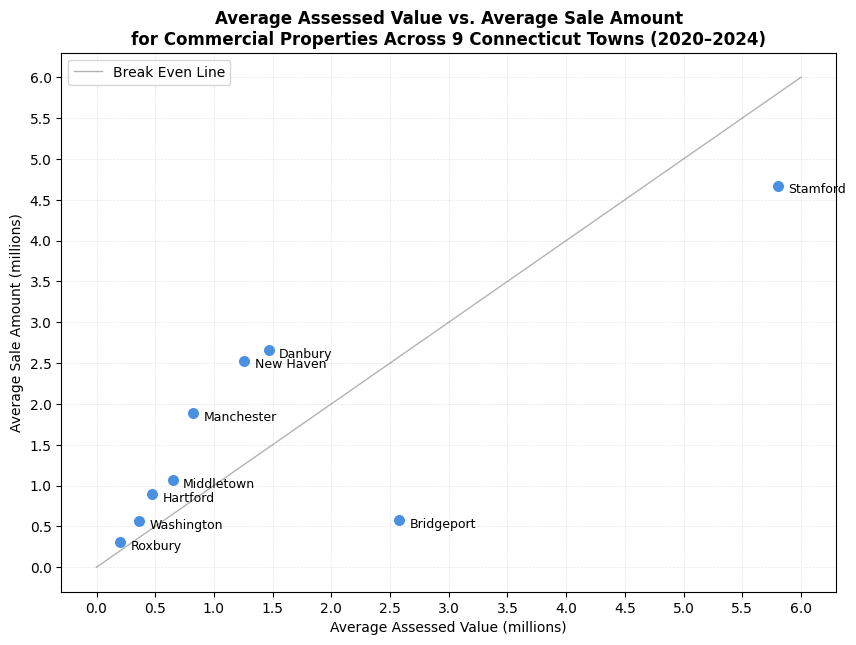

In [22]:
plt.figure(figsize=(10, 7))

plt.scatter(analysis_4_df['Assessed Value'], analysis_4_df['Sale Amount'], color="#4a90e2", alpha=1, edgecolor="white", s=80)

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)


for town in analysis_4_df.index:
    plt.text(analysis_4_df.loc[town, 'Assessed Value'] + 0.09,
             analysis_4_df.loc[town, 'Sale Amount'] - 0.09,
             town,
             fontsize=9)

# drawing y=x line
plt.plot([0, 6], [0, 6],
         color='black',
         linewidth=1.0,
         alpha=0.3,
         label='Break Even Line')

plt.xlabel("Average Assessed Value (millions)")
plt.ylabel("Average Sale Amount (millions)")
plt.title("Average Assessed Value vs. Average Sale Amount\nfor Commercial Properties Across 9 Connecticut Towns (2020–2024)", fontsize=12, weight="bold")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)

# setting increments of 0.5 million for both axes
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.show()

**Insights**: Urban centers like New Haven and Danbury seem to have stronger market demand than their assessed property values suggest, while places like Bridgeport and Stamford might be dealing with signs of overvaluation. In contrast, mid-sized and growing towns such as Middletown, Hartford, Washington, and Roxbury show consistent trends where sale prices exceed assessments, pointing to steady market performance and potential for stable growth.
